### Drive'ın Mount Edilmesi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Kütüphalerin Yüklenmesi

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


## Verilerin Yüklenmesi

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/spectrograms/"

In [ ]:
import glob
datasets = glob.glob("/content/drive/MyDrive/Colab Notebooks/spectrograms/*/*.png")

# Verilerin Listelenmesi

In [ ]:
len(list(datasets))


8732

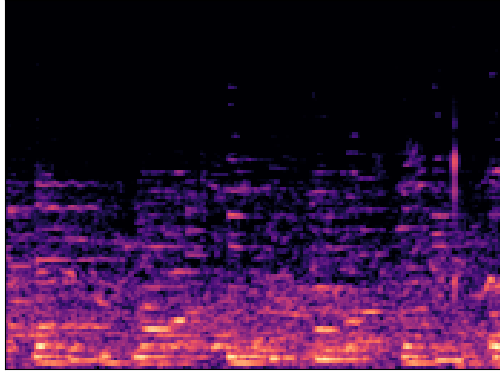

In [ ]:
PIL.Image.open(str(datasets[0]))

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='grayscale',
    image_size=(180, 180),
    batch_size=32, 
    shuffle=True)

Found 8732 files belonging to 10 classes.


In [ ]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 1)
(32,)


In [ ]:
train_ds.class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='grayscale',
    validation_split=0.2,
    subset="validation",
    image_size=(180, 180),
    batch_size=32)

val_ds


Found 8732 files belonging to 10 classes.
Using 1746 files for validation.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## ----------------------------------------------------------------------------

In [ ]:
normalization_layer = layers.Rescaling(1./255)


normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))



0.0 1.0


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(180, 180, 1)),
  layers.Conv2D(16, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)


Epoch 1/10
273/273 [==============================] - 958s 3s/step - loss: 1.4515 - accuracy: 0.4866 - val_loss: 1.1644 - val_accuracy: 0.5934
Epoch 2/10
273/273 [==============================] - 41s 146ms/step - loss: 1.1448 - accuracy: 0.6068 - val_loss: 0.9573 - val_accuracy: 0.6873
Epoch 3/10
273/273 [==============================] - 40s 144ms/step - loss: 0.9877 - accuracy: 0.6720 - val_loss: 0.8069 - val_accuracy: 0.7365
Epoch 4/10
273/273 [==============================] - 40s 144ms/step - loss: 0.8629 - accuracy: 0.7109 - val_loss: 0.7565 - val_accuracy: 0.7451
Epoch 5/10
273/273 [==============================] - 40s 145ms/step - loss: 0.7679 - accuracy: 0.7453 - val_loss: 0.6199 - val_accuracy: 0.8013
Epoch 6/10
273/273 [==============================] - 40s 144ms/step - loss: 0.6645 - accuracy: 0.7791 - val_loss: 0.5820 - val_accuracy: 0.8070
Epoch 7/10
273/273 [==============================] - 40s 143ms/step - loss: 0.6058 - accuracy: 0.7974 - val_loss: 0.4556 - val_accu

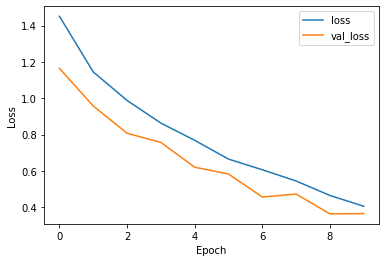

In [ ]:

plt.plot(history.history['loss'], label ='loss')

plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel("Epoch")
plt.ylabel('Loss')

plt.legend()

plt.show()

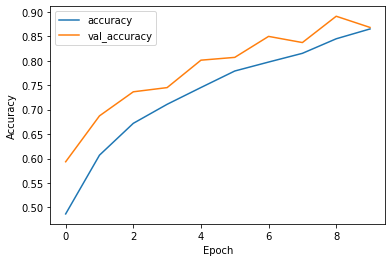

In [ ]:
plt.plot(history.history['accuracy'], label ='accuracy')

plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel("Epoch")
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180,180,1)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),

  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=8
)


Epoch 1/8
273/273 [==============================] - 43s 147ms/step - loss: 1.4908 - accuracy: 0.4490 - val_loss: 1.0666 - val_accuracy: 0.6123
Epoch 2/8
273/273 [==============================] - 41s 145ms/step - loss: 1.1196 - accuracy: 0.6081 - val_loss: 0.8630 - val_accuracy: 0.7096
Epoch 3/8
273/273 [==============================] - 41s 146ms/step - loss: 0.9548 - accuracy: 0.6748 - val_loss: 0.8954 - val_accuracy: 0.6707
Epoch 4/8
273/273 [==============================] - 41s 146ms/step - loss: 0.8276 - accuracy: 0.7223 - val_loss: 0.9775 - val_accuracy: 0.6552
Epoch 5/8
273/273 [==============================] - 41s 146ms/step - loss: 0.7579 - accuracy: 0.7416 - val_loss: 0.5904 - val_accuracy: 0.8030
Epoch 6/8
273/273 [==============================] - 40s 145ms/step - loss: 0.6956 - accuracy: 0.7600 - val_loss: 0.5376 - val_accuracy: 0.8190
Epoch 7/8
273/273 [==============================] - 41s 145ms/step - loss: 0.6550 - accuracy: 0.7798 - val_loss: 0.6440 - val_accuracy:

In [ ]:


model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

results = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
273/273 [==============================] - 42s 148ms/step - loss: 1.9749 - accuracy: 0.2786 - val_loss: 1.1005 - val_accuracy: 0.6804
Epoch 2/10
273/273 [==============================] - 40s 145ms/step - loss: 1.2471 - accuracy: 0.5632 - val_loss: 0.7618 - val_accuracy: 0.7486
Epoch 3/10
273/273 [==============================] - 41s 145ms/step - loss: 1.0149 - accuracy: 0.6638 - val_loss: 0.5952 - val_accuracy: 0.8116
Epoch 4/10
273/273 [==============================] - 41s 145ms/step - loss: 0.9247 - accuracy: 0.7075 - val_loss: 0.6183 - val_accuracy: 0.7732
Epoch 5/10
273/273 [==============================] - 41s 146ms/step - loss: 0.8684 - accuracy: 0.7258 - val_loss: 0.5579 - val_accuracy: 0.8230
Epoch 6/10
273/273 [==============================] - 41s 146ms/step - loss: 0.8179 - accuracy: 0.7470 - val_loss: 0.5607 - val_accuracy: 0.8121
Epoch 7/10
273/273 [==============================] - 41s 147ms/step - loss: 0.7952 - accuracy: 0.7561 - val_loss: 0.5347 - val_ac

In [ ]:
results = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
273/273 [==============================] - 42s 147ms/step - loss: 0.7010 - accuracy: 0.7892 - val_loss: 0.6525 - val_accuracy: 0.7743
Epoch 2/15
273/273 [==============================] - 41s 146ms/step - loss: 0.6694 - accuracy: 0.7962 - val_loss: 0.6600 - val_accuracy: 0.7761
Epoch 3/15
273/273 [==============================] - 41s 147ms/step - loss: 0.6388 - accuracy: 0.8023 - val_loss: 0.5894 - val_accuracy: 0.8024
Epoch 4/15
273/273 [==============================] - 41s 146ms/step - loss: 0.6341 - accuracy: 0.8065 - val_loss: 0.5733 - val_accuracy: 0.7990
Epoch 5/15
273/273 [==============================] - 41s 146ms/step - loss: 0.6116 - accuracy: 0.8147 - val_loss: 0.5448 - val_accuracy: 0.8242
Epoch 6/15
273/273 [==============================] - 41s 146ms/step - loss: 0.5862 - accuracy: 0.8258 - val_loss: 0.4994 - val_accuracy: 0.8299
Epoch 7/15
273/273 [==============================] - 41s 146ms/step - loss: 0.5818 - accuracy: 0.8246 - val_loss: 0.3980 - val_ac

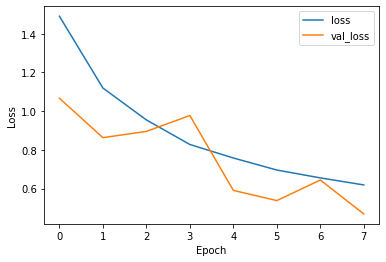

In [ ]:

plt.plot(history.history['loss'], label ='loss')

plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel("Epoch")
plt.ylabel('Loss')

plt.legend()

plt.show()

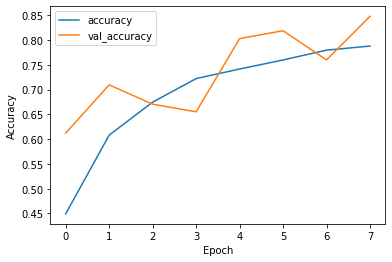

In [ ]:
plt.plot(history.history['accuracy'], label ='accuracy')

plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel("Epoch")
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [ ]:
prediction_model = model.predict(val_ds)

In [ ]:
prediction_model

array([[1.4092396e-03, 5.0749346e-03, 1.4378509e-02, ..., 2.8752198e-04,
        5.5426767e-04, 9.7744250e-01],
       [9.9699354e-01, 2.6978020e-09, 1.7657312e-06, ..., 5.0810086e-06,
        9.9574521e-08, 7.3027004e-05],
       [9.9964142e-01, 2.6758660e-13, 7.4507680e-09, ..., 1.4797956e-09,
        1.8009402e-10, 5.1604309e-07],
       ...,
       [1.6384212e-10, 2.3691424e-11, 2.1652624e-14, ..., 9.9810213e-01,
        4.1618479e-14, 8.5916591e-10],
       [9.9365263e-07, 7.3999971e-09, 2.1421414e-09, ..., 9.9373335e-01,
        5.5175366e-08, 2.9602954e-06],
       [6.5087230e-04, 4.3038331e-06, 1.8671924e-05, ..., 1.6017498e-01,
        9.2837518e-06, 2.5869056e-04]], dtype=float32)

In [ ]:
predicted_class = prediction_model.argmax()
# Find the prediction probability
predicted_probablity = prediction_model.max()

In [ ]:
print(f"ArgMax:  {predicted_class},  Max: {predicted_probablity} ")

ArgMax:  363,  Max: 1.0 
